In [17]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

In [2]:
data = pd.read_csv('Processed Data.csv')

In [8]:
data.drop('rowid', axis=1, inplace=True)
data.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_impact,...,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,LS,LS+MCMC,MCMC,none
0,CONFIRMED,1.000,0,0,0,0,9.488036,170.538750,2455003.539,0.146,...,0.080,0.130,0.310,0.170,0.320,0.160,False,True,False,False
1,CONFIRMED,0.969,0,0,0,0,54.418383,162.513840,2454995.514,0.586,...,0.490,0.340,0.120,0.730,0.500,0.450,False,True,False,False
2,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,2455008.850,0.969,...,0.002,0.071,-0.027,0.074,0.027,0.074,False,True,False,False
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,2455003.308,1.276,...,-0.257,0.072,0.099,0.077,0.276,0.076,False,True,False,False
4,CONFIRMED,1.000,0,0,0,0,2.525592,171.595550,2455004.596,0.701,...,0.070,0.180,0.020,0.160,0.070,0.200,False,True,False,False


In [9]:
X = data.drop('koi_disposition', axis=1)
y = data['koi_disposition']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier(n_estimators=400)
model.fit(X_train, y_train)

,n_estimators,400
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


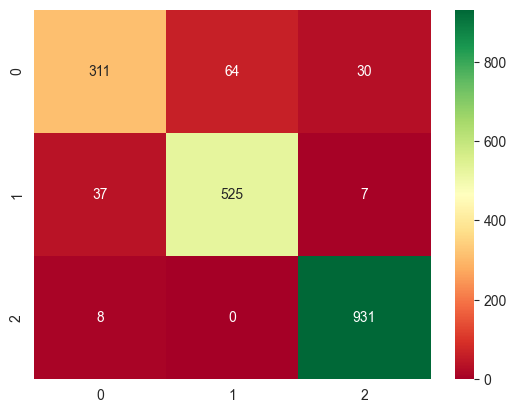

Accuracy:  0.9236800836382645
Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.87      0.77      0.82       405
     CONFIRMED       0.89      0.92      0.91       569
FALSE POSITIVE       0.96      0.99      0.98       939

      accuracy                           0.92      1913
     macro avg       0.91      0.89      0.90      1913
  weighted avg       0.92      0.92      0.92      1913



In [12]:
y_pred_model = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt="d", cmap="RdYlGn")
plt.show()
print('Accuracy: ', accuracy_score(y_test, y_pred_model))
print('Classification Report:\n', classification_report(y_test, y_pred_model))

In [14]:
params = {
    'n_estimators': [100,500,1000],
    'max_features': ['auto', 'sqrt', 'log2', 5,9,13],
    'max_depth': [10,13,20, None],
    'min_samples_split': [2,8,13,20],
}
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\Fixie\PycharmProjects\Competitions\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
240 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
159 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fixie\PycharmProjects\Competitions\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fixie\PycharmProjects\Competitions\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Fixie\P

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [10, 13, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [100, 500, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


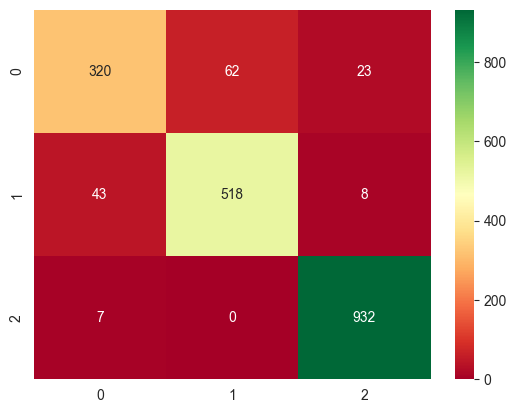

Accuracy:  0.9252483010977522
Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.86      0.79      0.83       405
     CONFIRMED       0.89      0.91      0.90       569
FALSE POSITIVE       0.97      0.99      0.98       939

      accuracy                           0.93      1913
     macro avg       0.91      0.90      0.90      1913
  weighted avg       0.92      0.93      0.92      1913



In [15]:
y_pred_grid = grid.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt="d", cmap="RdYlGn")
plt.show()
print('Accuracy: ', accuracy_score(y_test, y_pred_grid))
print('Classification Report:\n', classification_report(y_test, y_pred_grid))

In [16]:
grid.best_params_

{'max_depth': None,
 'max_features': 13,
 'min_samples_split': 8,
 'n_estimators': 500}

In [18]:
joblib.dump(model, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']